In [6]:
def unixifyPickle(original, destination):
    content = ''
    outsize = 0
    with open(original, 'rb') as infile:
        content = infile.read()
    with open(destination, 'wb') as output:
        for line in content.splitlines():
            outsize += len(line) + 1
            output.write(line + str.encode('\n'))

    print("Done. Saved %s bytes." % (len(content)-outsize))

In [57]:
# %load ./SourceFiles/ud120-projects/outliers/outlier_cleaner.py
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    errors = (net_worths-predictions)**2
    cleaned_data =list(zip(ages,net_worths,errors))
    cleaned_data = sorted(cleaned_data,key=lambda x:x[2][0], reverse=True)
    limit = int(len(net_worths)*0.1)
    return cleaned_data[limit:]

Done. Saved 100 bytes.
Done. Saved 100 bytes.


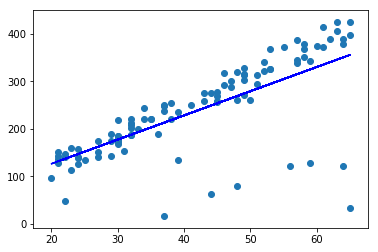

1
2
3


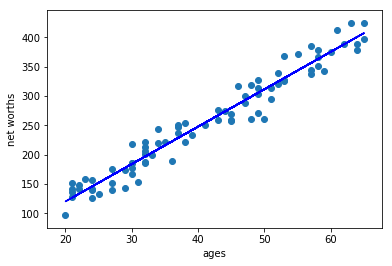

In [58]:
# %load ./SourceFiles/ud120-projects/outliers/outlier_removal_regression.py
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

### load up some practice data with outliers in it
ages_file = "./SourceFiles/ud120-projects/outliers/practice_outliers_ages_unix.pkl"
unixifyPickle("./SourceFiles/ud120-projects/outliers/practice_outliers_ages.pkl", ages_file)
ages = pickle.load( open(ages_file, "rb") )

net_worths_file = "./SourceFiles/ud120-projects/outliers/practice_outliers_net_worths_unix.pkl"
unixifyPickle("./SourceFiles/ud120-projects/outliers/practice_outliers_net_worths.pkl", net_worths_file)
net_worths = pickle.load( open(net_worths_file, "rb") )

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model

reg = linear_model.LinearRegression().fit(ages_train, net_worths_train)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    print("1")
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    print("2")
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        print("3")
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")



In [60]:
print(reg.intercept_)
print(reg.coef_)
reg.score(ages_test,net_worths_test)

[-6.91861069]
[[ 6.36859481]]


0.98318945539553215